In [1]:
# IMPORTING ALL THE LIBRARIES REQUIRED 

import pandas as pd              # dataframes
import numpy as np               # arrays
import re                        # regex
import nltk                      # NLP tools
from nltk.corpus import stopwords        # common words
from nltk.stem import WordNetLemmatizer  # lemmatizer
import matplotlib.pyplot as plt  # plotting
import seaborn as sns            # styled plots
import warnings                  # warnings
warnings.filterwarnings('ignore') # hide warnings
%matplotlib inline               
sns.set_theme(style="whitegrid") # plot theme
%pip install wordcloud           
from wordcloud import WordCloud  # word clouds
import matplotlib.pyplot as plt  # plotting
from sklearn.model_selection import train_test_split  # split data
from sklearn.preprocessing import LabelEncoder        # encode labels
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.pipeline import Pipeline                # ML pipeline
from sklearn.metrics import classification_report, confusion_matrix # evaluation
from sklearn.ensemble import RandomForestClassifier  # random forest
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF
from sklearn.pipeline import Pipeline                # pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay # confusion matrix
%pip -q install xgboost           
from sklearn.model_selection import GridSearchCV     # hyperparameter tuning
from xgboost import XGBClassifier # XGBoost model
import joblib                    # save models


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load the dataset 
file_path = 'Data/judge-1377884607_tweet_product_company.csv'
# encode due to special characters
df = pd.read_csv(file_path, encoding='latin1')
# check info and top 5 rows
print("Dataset Dimensions:", df.shape)
df.head()

Dataset Dimensions: (9093, 3)


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
# rename columns
df.columns = ['tweet_text', 'product_target', 'sentiment']
df.head()

,tweet_text,product_target,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
# check missing values 
print("Missing Values Count")
print(df.isna().sum())

# check duplicates
duplicates = df.duplicated(subset=['tweet_text']).sum()
print(f"\nDuplicate tweets found: {duplicates}")
# remove duplicated tweets
df = df.drop_duplicates(subset=['tweet_text'])
 
df.head()

Missing Values Count
tweet_text           1
product_target    5802
sentiment            0
dtype: int64

Duplicate tweets found: 27


,tweet_text,product_target,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [5]:
# create a function to group Google and Apple products
# this function also reduces missing values in the product category
def impute_product(row):
    text = str(row['tweet_text']).lower()
    if pd.isna(row['product_target']):
        if 'iphone' in text or 'apple' in text or 'ipad' in text:
            return 'Apple'
        if 'google' in text or 'android' in text:
            return 'Google'
    return row['product_target']

df['product_target'] = df.apply(impute_product, axis=1)


# check for missing values
print("Missing Values Count")
print(df.isna().sum())

Missing Values Count
tweet_text          1
product_target    760
sentiment           0
dtype: int64


Unique Sentiment Labels:
No emotion toward brand or product    5373
Positive emotion                      2968
Negative emotion                       569
I can't tell                           156
Name: sentiment, dtype: int64


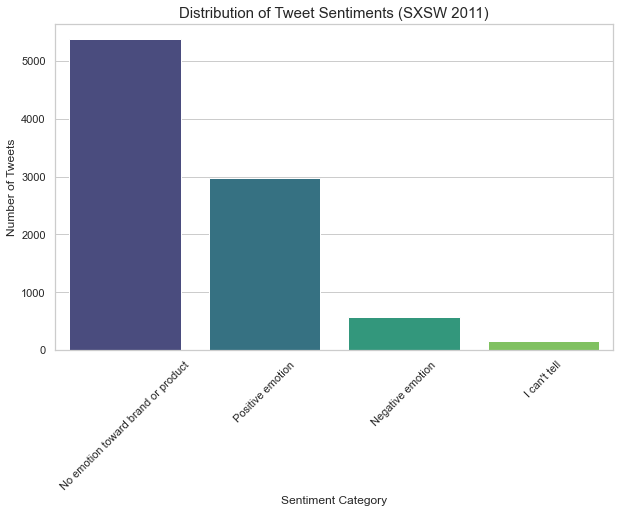


-Sentiment Percentages -
No emotion toward brand or product    59.27%
Positive emotion                      32.74%
Negative emotion                       6.28%
I can't tell                           1.72%
Name: sentiment, dtype: object


In [6]:
# unique values - sentiment column
print("Unique Sentiment Labels:")
print(df['sentiment'].value_counts())

# visualize distribution of sentiments
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, palette='viridis', order=df['sentiment'].value_counts().index)

plt.title('Distribution of Tweet Sentiments (SXSW 2011)', fontsize=15)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# calculate percentages
sentiment_pct = df['sentiment'].value_counts(normalize=True) * 100
print("\n-Sentiment Percentages -")
print(sentiment_pct.map('{:.2f}%'.format))